In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train=pd.read_csv('train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_train.drop(['PassengerId','Cabin','Embarked','Name','Ticket','SibSp','Parch'],axis='columns',inplace=True)

In [7]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [8]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [9]:
df_train.Age=df_train.Age.fillna(df_train.Age.mean())

In [10]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [11]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
dtype: object

In [12]:
df_train


,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.000000,7.2500
1,1,1,female,38.000000,71.2833
2,1,3,female,26.000000,7.9250
3,1,1,female,35.000000,53.1000
4,0,3,male,35.000000,8.0500
...,...,...,...,...,...
886,0,2,male,27.000000,13.0000
887,1,1,female,19.000000,30.0000
888,0,3,female,29.699118,23.4500
889,1,1,male,26.000000,30.0000


In [13]:
dummy=pd.get_dummies(df_train.Sex)

In [14]:
dummy

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [15]:
df=pd.concat([df_train,dummy],axis='columns')

In [16]:
df

,Survived,Pclass,Sex,Age,Fare,female,male
0,0,3,male,22.000000,7.2500,0,1
1,1,1,female,38.000000,71.2833,1,0
2,1,3,female,26.000000,7.9250,1,0
3,1,1,female,35.000000,53.1000,1,0
4,0,3,male,35.000000,8.0500,0,1
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,0,1
887,1,1,female,19.000000,30.0000,1,0
888,0,3,female,29.699118,23.4500,1,0
889,1,1,male,26.000000,30.0000,0,1


In [17]:
df.drop(['Sex'],axis=True,inplace=True)

In [18]:
df

,Survived,Pclass,Age,Fare,female,male
0,0,3,22.000000,7.2500,0,1
1,1,1,38.000000,71.2833,1,0
2,1,3,26.000000,7.9250,1,0
3,1,1,35.000000,53.1000,1,0
4,0,3,35.000000,8.0500,0,1
...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,0,1
887,1,1,19.000000,30.0000,1,0
888,0,3,29.699118,23.4500,1,0
889,1,1,26.000000,30.0000,0,1


In [19]:
df.describe()

,Survived,Pclass,Age,Fare,female,male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208,0.352413,0.647587
std,0.486592,0.836071,13.002015,49.693429,0.477990,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,29.699118,14.454200,0.000000,1.000000
75%,1.000000,3.000000,35.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000,1.000000


In [20]:
df.dtypes

Survived      int64
Pclass        int64
Age         float64
Fare        float64
female        uint8
male          uint8
dtype: object

<AxesSubplot:>

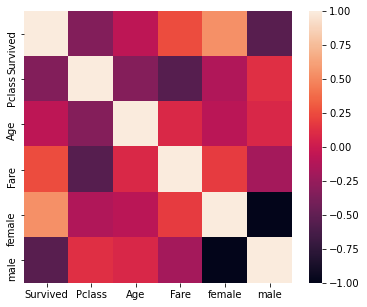

In [21]:
import seaborn as sns
plt.figure(figsize=(6,5))
sns.heatmap(df.corr())

In [22]:
df

,Survived,Pclass,Age,Fare,female,male
0,0,3,22.000000,7.2500,0,1
1,1,1,38.000000,71.2833,1,0
2,1,3,26.000000,7.9250,1,0
3,1,1,35.000000,53.1000,1,0
4,0,3,35.000000,8.0500,0,1
...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,0,1
887,1,1,19.000000,30.0000,1,0
888,0,3,29.699118,23.4500,1,0
889,1,1,26.000000,30.0000,0,1


In [23]:
x=df.iloc[:,1:].values

In [24]:
x

array([[ 3.        , 22.        ,  7.25      ,  0.        ,  1.        ],
       [ 1.        , 38.        , 71.2833    ,  1.        ,  0.        ],
       [ 3.        , 26.        ,  7.925     ,  1.        ,  0.        ],
       ...,
       [ 3.        , 29.69911765, 23.45      ,  1.        ,  0.        ],
       [ 1.        , 26.        , 30.        ,  0.        ,  1.        ],
       [ 3.        , 32.        ,  7.75      ,  0.        ,  1.        ]])

In [25]:
y=df.iloc[:,0].values

In [26]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [28]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()

In [29]:
l.fit(x_train,y_train)

LogisticRegression()

In [30]:
l.score(x_test,y_test)

0.8268156424581006